<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Fundamentos de programación**


El presente curso hace parte de la especialización de analítica y ciencia de datos de la facultad de Ingeniería de la Universidad de Antioquia.

## **Sesión 8**

## **Contenido**
  
- <a href="#def"> Definición, Serie de tiempo</a><br>
- <a href="#analysis"> Análisis Exploratorio de Series de Tiempo</a><br>
- <a href="#ope"> Operaciones sobre los arreglos</a><br>
- <a href="#apeA"> Apéndice A: Iteradores útiles</a><br>

Hasta ahora nos hemos enfocado en tratar los datos sin una ordinalidad predeterminada, más que la que se imponga de acuerdo con un interés arbitrario. Sin embargo si nuestra data viniera muestreada en orden por un tiempo en el que se tomó la medición (o el grupo de mediciones), la ordinalidad de esta estaría claramente determinada por dicho tiempo.

<p><a name="def"></a></p>

## **Definición: Serie de Tiempo**

Una serie de tiempo es una secuencia de observaciones registradas pero no exclusiva en distintos puntos de tiempo, generalmente (pero no de forma exclusiva) en intervalos regulares. Estas en la gran mayoría de casos, usan la variable tiempo como variable independiente, o en nuestro caso como índice, por lo que todas las otras variables son funciones del tiempo. 

En adelante, usaremos la expresión serie de tiempo para referirnos a las estructuras de datos que contengan información temporal como índice, independientemente de si hablamos de un `pd.Series` ó `pd.DataFrame`. 



Podemos ver un ejemplo de las series de tiempo en general cuando consultamos [divisas](https://www.google.com/finance/quote/USD-EUR?sa=X&ved=2ahUKEwjd64L6kcCLAxVXUUEAHfZONtgQmY0JegQIERAu) o [acciones](https://www.google.com/finance/quote/NVDA:NASDAQ?sa=X&ved=2ahUKEwjP6-v9ksCLAxWkYEEAHVFWAtcQ3ecFegQIUxAf) en google 

![Ejemplo Serie de Tiempo](https://mattermost.web.cern.ch/api/v4/files/j8bn11ysgirriyugbctu6rwkyo/preview "Title")


Dependiendo de el area de trabajo las series de tiempo aparecen con más frecuencia o no. En general la primera pregunta a responder con ellas (al igual que con cualquier otra variable en un análisis) es, son determinantes o no. En caso de que de manera definitiva se necesiten en general es buena idea asignar la variable de tiempo a un índice. Si no se necesita, se puede eliminar del dataset de análisis. De no estar seguro, lo mejor será mantener la variable sin ascenderla a índice. 

## **Aplicaciones**

Entre las aplicaciones más sobresalientes (claramente no restrictas de ningún lado):

- Finanzas: Predicción de precios de acciones, volatilidad, riesgo
- Meteorología: Predicción de clima, temperatura y precipitaciones
- Economía: Analisis de PIB, inflación, tasas de desempleo
- Salud: Analisis de enfermedades, mediciones de respuestas corporales y propagaciones endémicas
- Sensores: Monitoreo de dispositivos inteligentes, tráfico de red
- Marketing: Predicción de demanda, optimización de publicidad.

## **Datos estáticos vs datos temporales**

No todos los datos tienen una dependencia temporal, y además no todos precisan de esta. Es fácil pensar en datos que no tienen una dependencia temporal. La mayoría de datasets en [el repositorio de datos clase](https://github.com/tomasate/Datos_Clases/tree/main/Datos_1) son datos que no tienen ninguna clase de dependencia temporal.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json 
sns.set()

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tomasate/Datos_Clases/refs/heads/main/Datos_1/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.MODELYEAR.unique()

array([2014])

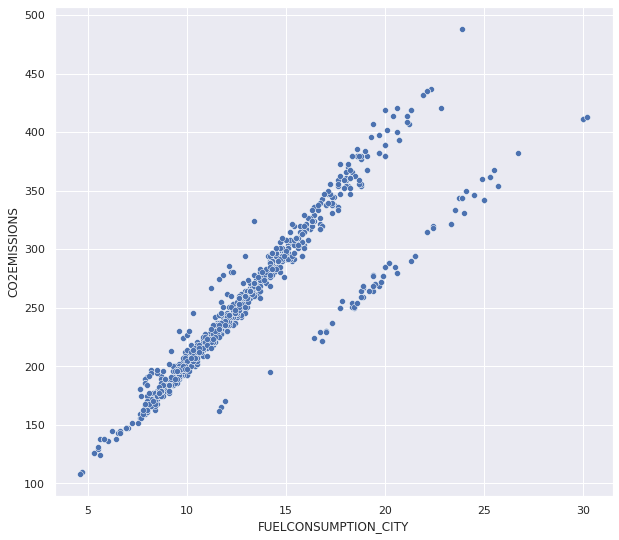

In [5]:
plt.figure(figsize = (10,9))
sns.scatterplot(data = df, x = 'FUELCONSUMPTION_CITY', y = 'CO2EMISSIONS');

Sin embargo hay otros que claramente reflejan una profunda dependencia con el tiempo

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/tomasate/Datos_Clases/refs/heads/main/Datos_1/ETH_1h.csv')
df.columns = df.columns.str.lower()
df.head()

,date,symbol,open,high,low,close,volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Open    23674 non-null  float64
 3   High    23674 non-null  float64
 4   Low     23674 non-null  float64
 5   Close   23674 non-null  float64
 6   Volume  23674 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


La forma más sencilla de proceder en estos casos es convertir la columna `Date` en un `datetime`. Pandas tiene una función que facilita esta tarea. 

In [12]:
try:
    pd.to_datetime(df['date'])
except Exception as e:
    print(e)

Unknown string format: 2020-03-13 08-PM


En este caso hay un error debido a que Pandas no reconoce fácilmente el formato de essta columna, por lo que se hace necesario especificarlo. 

In [13]:
pd.to_datetime(df['date'], format = "%Y-%m-%d %I-%p")

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: date, Length: 23674, dtype: datetime64[ns]

Dependiendo del tipo de datetime el formateo puede ser más sencillo, incluso innecesario, o lo suficientemente tedioso, siempre es útil tener a la mano un  par de tablas como las siguientes, consultar la [URL pystrftime](https://strftime.org/):

Para fechas:
| Código  | Significado                          | Ejemplo  |
|---------|--------------------------------------|----------|
| %Y      | Año con 4 dígitos                   | 2024     |
| %y      | Año con 2 dígitos                   | 24       |
| %m      | Mes con 2 dígitos (01-12)           | 07       |
| %B      | Nombre completo del mes             | July     |
| %b / %h | Nombre corto del mes (3 letras)     | Jul      |
| %d      | Día del mes con 2 dígitos (01-31)   | 05       |
| %j      | Día del año (001-366)               | 186      |
| %U      | Número de semana del año (domingo como primer día) | 27 |
| %W      | Número de semana del año (lunes como primer día)  | 27 |

Para horas:

| Código  | Significado                               | Ejemplo  |
|---------|-----------------------------------------|----------|
| %H      | Hora en formato de 24 horas (00-23)    | 15       |
| %I      | Hora en formato de 12 horas (01-12)    | 03       |
| %p      | AM o PM                                | PM       |
| %M      | Minutos (00-59)                        | 45       |
| %S      | Segundos (00-59)                       | 30       |
| %f      | Microsegundos (000000-999999)          | 123456   |
| %z      | Zona horaria UTC (+HHMM o -HHMM)      | +0100    |
| %Z      | Nombre de la zona horaria             | UTC      |

Para semanas:

| Código  | Significado                           | Ejemplo   |
|---------|--------------------------------------|-----------|
| %A      | Nombre completo del día              | Wednesday |
| %a      | Nombre corto del día (3 letras)      | Wed       |
| %w      | Día de la semana (0=Domingo, 6=Sábado) | 3       |

Hagamos de la columna Date el índice.


In [14]:
df['date'] = pd.to_datetime(df['date'], format = "%Y-%m-%d %I-%p")
df

,date,symbol,open,high,low,close,volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [15]:
df.date.dt.strftime("%d/%m%y %H:%M:%S")

0        13/0320 20:00:00
1        13/0320 19:00:00
2        13/0320 18:00:00
3        13/0320 17:00:00
4        13/0320 16:00:00
               ...       
23669    01/0717 15:00:00
23670    01/0717 14:00:00
23671    01/0717 13:00:00
23672    01/0717 12:00:00
23673    01/0717 11:00:00
Name: date, Length: 23674, dtype: object

In [16]:
df.set_index('date', inplace = True)
df.head()

,symbol,open,high,low,close,volume
date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


Aunque el dataset ahora tiene la estructura que deseamos, podíamos estar interesados en que el formato de nuestro nuevo índice sea diferente. 



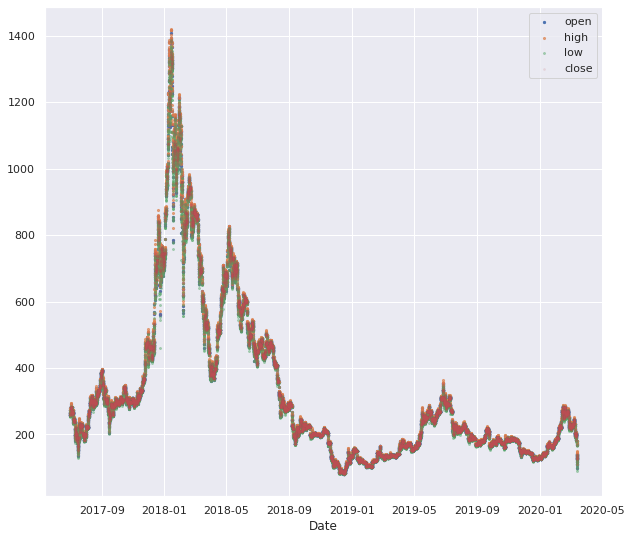

In [19]:
plt.figure(figsize = (10, 9))

lw = 5
alpha = 1

for column in df.columns:
    if column in ['symbol', 'volume']:
        continue
    plt.scatter(df.index, df[column], label = column, s = lw, alpha = alpha)
    lw -= 0.6
    alpha -= 0.3

plt.legend()
plt.xlabel('Date');

Este dataset es muy grande quisá podamos agrupar los datos por día

In [42]:
df_d = df.resample('D').agg({
    "open": "first",
    "high": 'max',
    "low": 'min',
    "close": "last",
    'volume': 'mean'
})
df_d

,open,high,low,close,volume
date,,,,,
2017-07-01,279.98,279.99,253.23,263.12,2.198771e+06
2017-07-02,263.12,293.73,255.70,285.00,2.177595e+06
2017-07-03,285.00,285.00,273.07,276.37,1.459015e+06
2017-07-04,276.37,282.83,265.00,269.20,1.254579e+06
2017-07-05,269.20,274.97,252.67,266.27,1.797923e+06
...,...,...,...,...,...
2020-03-09,199.46,208.65,189.85,202.77,3.804752e+06
2020-03-10,202.77,206.28,195.17,200.50,1.553063e+06
2020-03-11,200.50,202.98,181.00,194.61,1.894868e+06


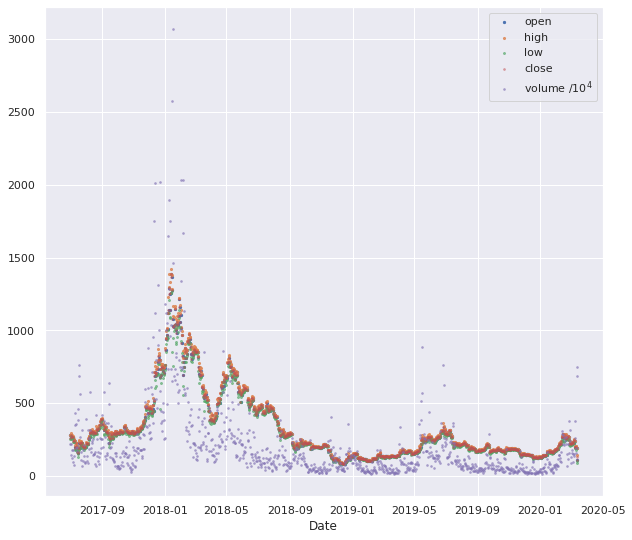

In [31]:
plt.figure(figsize = (10, 9))

lw = 5
alpha = 1

for column in df_d.columns:
    if column in ['symbol']:
        continue
    elif column == 'volume':
        plt.scatter(df_d.index, df_d[column] / 10000, label = f"{column} $/10^4$", s = 3, alpha = 0.5)
    else:
        plt.scatter(df_d.index, df_d[column], label = column, s = lw, alpha = alpha)
    lw -= 0.6
    alpha -= 0.2

plt.legend()
plt.xlabel('Date');

Haciendo lo propio por semana

In [32]:
df_w = df.resample('W').agg({
    "open": "first",
    "high": 'max',
    "low": 'min',
    "close": "last",
    'volume': 'mean'
})

df_w

,open,high,low,close,volume
date,,,,,
2017-07-02,279.98,293.73,253.23,285.00,2.185035e+06
2017-07-09,285.00,285.00,231.25,238.81,1.337349e+06
2017-07-16,238.81,240.33,130.26,155.68,2.986756e+06
2017-07-23,155.68,249.40,153.25,228.31,4.298593e+06
2017-07-30,228.31,229.99,178.03,196.95,1.581729e+06
...,...,...,...,...,...
2020-02-16,228.80,290.00,216.31,258.50,2.329087e+06
2020-02-23,258.50,287.13,242.36,275.48,1.826094e+06
2020-03-01,275.48,278.13,209.26,217.26,2.198762e+06


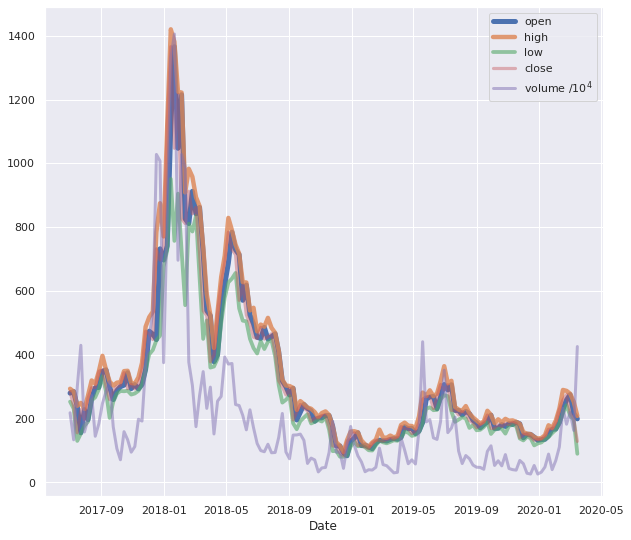

In [36]:
plt.figure(figsize = (10, 9))

lw = 5
alpha = 1

for column in df_w.columns:
    if column in ['symbol']:
        continue
    elif column == 'volume':
        plt.plot(df_w.index, df_w[column] / 10000, label = f"{column} $/10^4$", linewidth = 3, alpha = 0.5)
    else:
        plt.plot(df_w.index, df_w[column], label = column, linewidth = lw, alpha = alpha)
    lw -= 0.6
    alpha -= 0.2

plt.legend()
plt.xlabel('Date');

In [37]:
df_d = df.resample('2D').agg({
    "open": "first",
    "high": 'max',
    "low": 'min',
    "close": "last",
    'volume': 'mean'
})
df_d

,open,high,low,close,volume
date,,,,,
2017-07-01,279.98,293.73,253.23,285.00,2.185035e+06
2017-07-03,285.00,285.00,265.00,269.20,1.356797e+06
2017-07-05,269.20,275.00,252.67,266.01,1.380312e+06
2017-07-07,266.01,266.97,231.25,246.64,1.578890e+06
2017-07-09,246.64,253.31,185.39,202.86,2.106293e+06
...,...,...,...,...,...
2020-03-05,224.56,245.84,224.49,245.56,1.457930e+06
2020-03-07,245.56,253.01,196.00,199.46,2.053744e+06
2020-03-09,199.46,208.65,189.85,200.50,2.678907e+06


<p><a name="analysis"></a></p>

# **Análisis Exploratorio de Series de Tiempo**

Antes de modelar o concluir un dataset con series de tiempo, es importante entender su comportamiento.

1. Tendencia:
   - Comportamiento a largo plazo y global de la serie: creciente, decreciente o estable
   - Representa cambios estructurales en los datos con el paso del tiempo
2. Estacionalidad:
   - Corresponde a patrones repetitivos en intervalos de tiempos periódicos (días, semanas, meses, años o décadas)
   - Un claro ejemplo de esto es el número de juguetes vendidos o de reproducciones de Mariah Carey
3. Ruido:
   - Que tanto se alejan los datos de una tendencia central
   - Usualmente se debe a eventos inesperados 

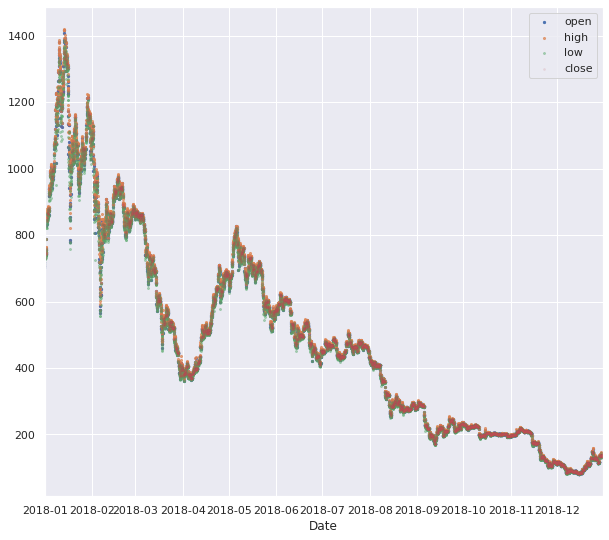

In [38]:
plt.figure(figsize = (10, 9))

year = 2018
begin = pd.to_datetime(f"{year}-01-01")
end = pd.to_datetime(f"{year}-12-31")
lw = 5
alpha = 1

for column in df.columns:
    if column in ['symbol', 'volume']:
        continue
    plt.scatter(df.index, df[column], label = column, s = lw, alpha = alpha)
    lw -= 0.6
    alpha -= 0.3

plt.xlim(begin, end)
plt.legend()
plt.xlabel('Date');

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

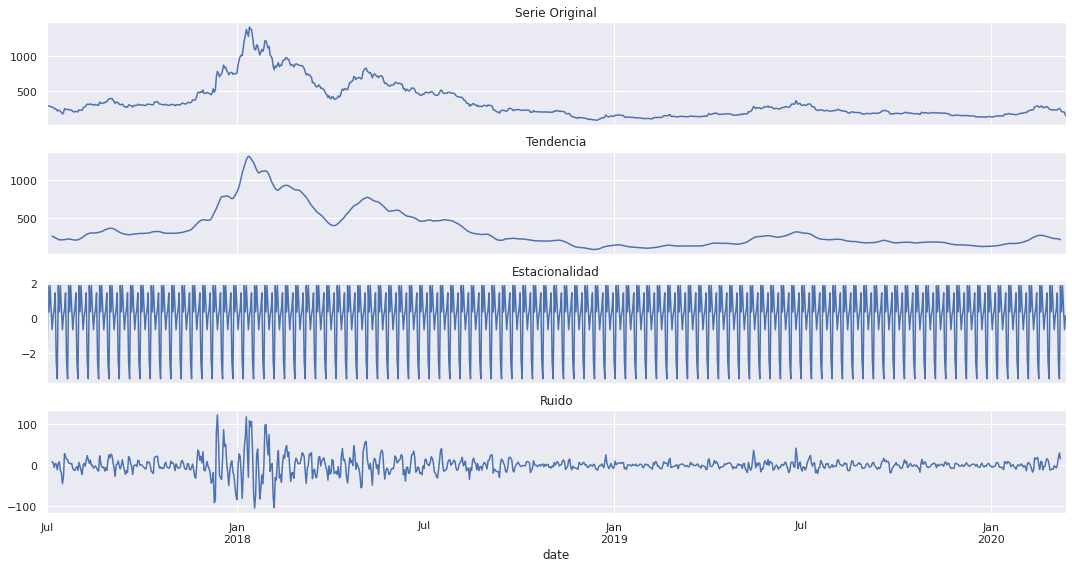

In [45]:
decomp = seasonal_decompose(df_d['high'], model = 'additive', period = 10)

fig, ax = plt.subplots(4,1, figsize = (15, 8), sharex =True)

df_d['high'].plot(ax=ax[0], title = 'Serie Original')
decomp.trend.plot(ax=ax[1], title = 'Tendencia')
decomp.seasonal.plot(ax=ax[2], title = 'Estacionalidad')
decomp.resid.plot(ax=ax[3], title = 'Ruido')

plt.tight_layout();

## **Modelo Aditivo `(model='additive')`**
Se asume que la serie de tiempo es la suma de sus componentes:

$$Y_t = T_t + S_t + R_t$$
​
 
Donde:

- $Y_t$ es el valor de la serie en el tiempo 

​
- $T_t$ es la tendencia.
- $S_t$ es la estacionalidad.
- $R_t$ es el residuo (ruido aleatorio).

**Cuándo usarlo:**
Cuando la variación estacional es constante a lo largo del tiempo (ejemplo: ventas que suben o bajan siempre en la misma cantidad).
Si la serie no tiene cambios porcentuales en su estacionalidad.
Cuando los datos no tienen valores cercanos a cero (para evitar números negativos).

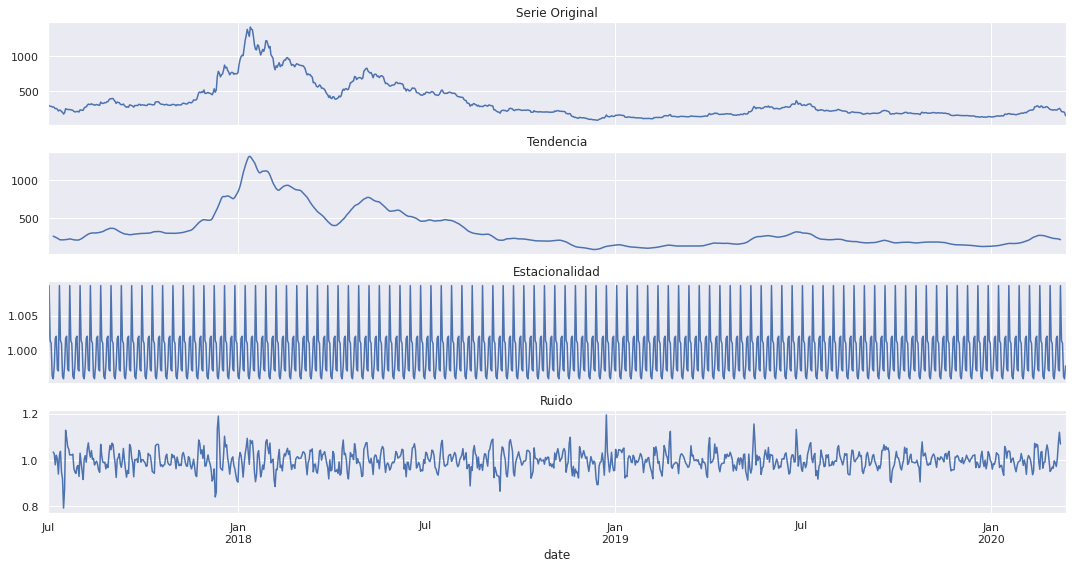

In [46]:
decomp = seasonal_decompose(df_d['high'], model = 'multiplicative', period = 10)

fig, ax = plt.subplots(4,1, figsize = (15, 8), sharex =True)

df_d['high'].plot(ax=ax[0], title = 'Serie Original')
decomp.trend.plot(ax=ax[1], title = 'Tendencia')
decomp.seasonal.plot(ax=ax[2], title = 'Estacionalidad')
decomp.resid.plot(ax=ax[3], title = 'Ruido')

plt.tight_layout();

## **Modelo Aditivo `(model='multiplicative')`**
Se asume que la serie de tiempo es la suma de sus componentes:

$$Y_t = T_t \times S_t \times R_t$$

**Cuándo usarlo:**
Si la tendencia crece y las fluctuaciones estacionales aumentan en magnitud.
Ejemplo: ventas de una empresa que crecen con el tiempo y en diciembre se duplican en lugar de aumentar en una cantidad fija.

**HINT:** Escoja siempre el que más aleatorio, tenga en cuenta, si la amplitud de las fluctuaciones estacionales permanece constante quizás quiera usar el aditivo, sino, y crece o decrece con el tiempo podría verse inclinado por el multiplicativo.

## **Autocorrelación y función de correlación**

La autocorrelación mide la relación en una serie de tiempo con si misma en distintos intervalos

Text(0.5, 1.0, 'Función de Auto-correlacion (ACF)')

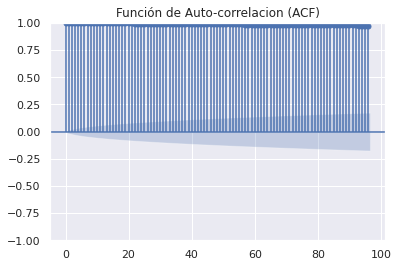

In [47]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['open'], lags = 24*4)
plt.title("Función de Auto-correlacion (ACF)")

El gráfico anterior  mide cómo los valores de la serie de tiempo están correlacionados con versiones retrasadas de sí mismos (lags). 
La autocorrelación en el lag 0 siempre es 1 porque un dato está perfectamente correlacionado consigo mismo. las barras verticales miden la correlación a un delay. La correlación es de 1, lo que indica una fuerte periodicidad o estacionalidad, y el ruido no es simplemente aleatorio, se debe a fenomenología y no a fenómenos estocásticos.

# **Promedio movil**

Es una técnica de suavizado utilizada en series de tiempo para identificar tendencias al reducir la variabilidad causada por fluctuaciones aleatorias o ruido. Se calcula promediando los valores de la serie en una ventana deslizante de tiempo.

Existen dos tipos principales:

## **Promedio Móvil Simple (SMA - Simple Moving Average)**

Es el más básico. Se calcula promediando los últimos $n$ valores de la serie.

$$SMA_t = \frac{X_{t}+ X_{t-1}+X_{t-2}+X_{t-(n-1)}}{n}$$

In [50]:
s = df['open'].rolling(window = 24 * 7).mean()
s

date
2020-03-13 20:00:00           NaN
2020-03-13 19:00:00           NaN
2020-03-13 18:00:00           NaN
2020-03-13 17:00:00           NaN
2020-03-13 16:00:00           NaN
                          ...    
2017-07-01 15:00:00    265.785060
2017-07-01 14:00:00    265.940536
2017-07-01 13:00:00    266.131190
2017-07-01 12:00:00    266.346429
2017-07-01 11:00:00    266.586726
Name: open, Length: 23674, dtype: float64

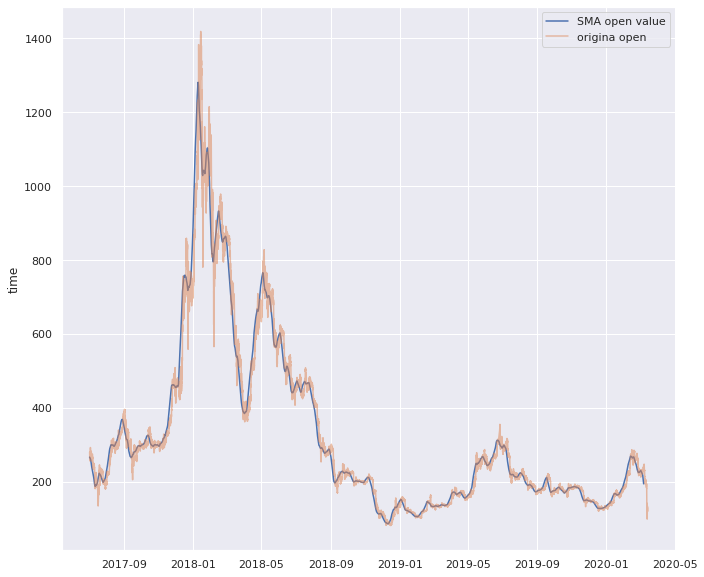

In [54]:
plt.figure(figsize = (11,10))

plt.plot(s, label ='SMA open value')
plt.plot(df['open'], label = 'origina open', alpha = 0.5)
plt.legend()
plt.ylabel('time');

## **Promedio Móvil Exponencial (EMA - Exponential Moving Average)**

A diferencia del SMA, el EMA asigna más peso a los valores más recientes, haciéndolo más reactivo a los cambios en la serie de tiempo.

$$EMA_t = (X_t\times \alpha) + EMA_{t-1}\times (1-\alpha)$$

where $\alpha = 2/(n+1)$



In [55]:
s = df['open'].ewm(span = 24*7).mean()
s

date
2020-03-13 20:00:00    129.940000
2020-03-13 19:00:00    124.693958
2020-03-13 18:00:00    124.618415
2020-03-13 17:00:00    124.481398
2020-03-13 16:00:00    124.556884
                          ...    
2017-07-01 15:00:00    262.092775
2017-07-01 14:00:00    262.172032
2017-07-01 13:00:00    262.321831
2017-07-01 12:00:00    262.471986
2017-07-01 11:00:00    262.679182
Name: open, Length: 23674, dtype: float64

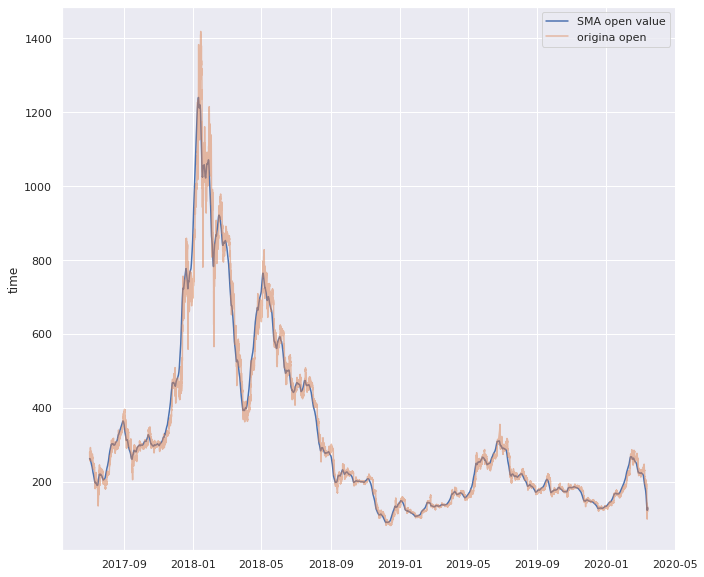

In [57]:
plt.figure(figsize = (11,10))


plt.plot(s, label ='SMA open value')
plt.plot(df['open'], label = 'origina open', alpha = 0.5)
plt.legend()
plt.ylabel('time');